In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, roc_auc_score, plot_roc_curve, confusion_matrix
import numpy as np
from itertools import combinations
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## First model on unstandarised data using only numeric columns

In [54]:
df_copy = pd.read_csv('df_basic.csv')

In [55]:
target = 'Survived'
features_num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [56]:
train_x, test_x, train_y, test_y = train_test_split(df_copy[features_num], df_copy[target], random_state=42)

In [57]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(668, 5)
(668,)
(223, 5)
(223,)


In [58]:
model = LogisticRegression()

In [59]:
model.fit(train_x, train_y)

LogisticRegression()

### model evaluation

In [60]:
pred_test = model.predict(test_x)

In [61]:
pred_test_proba = model.predict_proba(test_x)[:,1]

In [62]:
accuracy_score(test_y, pred_test)

0.7354260089686099

In [63]:
precision_score(test_y, pred_test)

0.7419354838709677

In [64]:
confusion_matrix(test_y, pred_test)

array([[118,  16],
       [ 43,  46]], dtype=int64)

In [65]:
roc_auc_score(test_y, pred_test_proba)

0.7758259265470401

In [66]:
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       134
           1       0.74      0.52      0.61        89

    accuracy                           0.74       223
   macro avg       0.74      0.70      0.70       223
weighted avg       0.74      0.74      0.72       223



F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


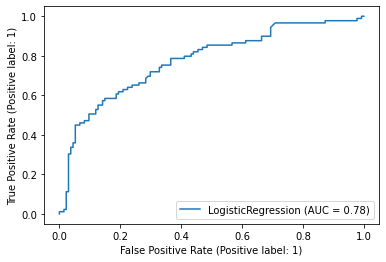

In [67]:
plot_roc_curve(model, test_x, test_y)

### Creating functions to automate things

In [68]:
def modeling_logistic(train_x, test_x, train_y, test_y, features_list:list, target):
    model = LogisticRegression()
    model.fit(train_x, train_y)
    pred_train = model.predict(train_x)
    pred_train_proba = model.predict_proba(train_x)[:,1]
    pred_test = model.predict(test_x)
    pred_test_proba = model.predict_proba(test_x)[:,1]
    print("---For training data---")
    print("Accurace score:", accuracy_score(train_y, pred_train))
    print("Precision score:", precision_score(train_y, pred_train))
    print('Confusion matrix:')  
    print(confusion_matrix(train_y, pred_train))
    print("Roc auc score:", roc_auc_score(train_y, pred_train_proba))
    print("---For test data---")
    print("Accurace score:", accuracy_score(test_y, pred_test))
    print("Precision score:", precision_score(test_y, pred_test))
    print('Confusion matrix:')
    print(confusion_matrix(test_y, pred_test))
    print("Roc auc score:", roc_auc_score(test_y, pred_test_proba))
    

In [69]:
modeling_logistic(train_x, test_x, train_y, test_y, features_num, target)

---For training data---
Accurace score: 0.6946107784431138
Precision score: 0.6521739130434783
Confusion matrix:
[[359  56]
 [148 105]]
Roc auc score: 0.7215534073051098
---For test data---
Accurace score: 0.7354260089686099
Precision score: 0.7419354838709677
Confusion matrix:
[[118  16]
 [ 43  46]]
Roc auc score: 0.7758259265470401


## Created function that searches for best features combination

In [70]:
def modeling_cols(train_x, test_x, train_y, test_y, features_list:list, target):
    combin = []
    for i in range(2, len(features_list)+1): # 19
        combin.append(set(combinations(features_list, i)))
    results = {'columns': [], 'train_accuracy': [], 'train_precision': [], 'train_roc_auc_score': [], 'test_accuracy': [], 
               'test_precision': [], 'test_roc_auc_score': []}
    for features in combin:
        for comb in features:
            comb = list(comb)
            results['columns'].append(comb)
            model = LogisticRegression()
            model.fit(train_x[comb], train_y)
            pred_train = model.predict(train_x[comb])
            pred_train_proba = model.predict_proba(train_x[comb])[:,1]
            pred_test = model.predict(test_x[comb])
            pred_test_proba = model.predict_proba(test_x[comb])[:,1]
            results['train_accuracy'].append(accuracy_score(train_y, pred_train))
            results['train_precision'].append(precision_score(train_y, pred_train))
            results['train_roc_auc_score'].append(roc_auc_score(train_y, pred_train_proba))
            results['test_accuracy'].append(accuracy_score(test_y, pred_test))
            results['test_precision'].append(precision_score(test_y, pred_test))
            results['test_roc_auc_score'].append(roc_auc_score(test_y, pred_test_proba))
    return pd.DataFrame(results)

In [71]:
df_results = modeling_cols(train_x, test_x, train_y, test_y, features_num, target)

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Best found accuracy for only numeric columns is 75.7 % using only 3 of them Pclass, Age, Parch

In [72]:
df_results.sort_values(by='test_accuracy', ascending=False)

,columns,train_accuracy,train_precision,train_roc_auc_score,test_accuracy,test_precision,test_roc_auc_score
12,"[Pclass, Age, Parch]",0.693114,0.644578,0.708343,0.757848,0.761194,0.762578
24,"[Pclass, Age, Parch, Fare]",0.694611,0.656051,0.712767,0.739910,0.738462,0.768028
22,"[Pclass, Age, SibSp, Parch]",0.690120,0.635294,0.716072,0.739910,0.731343,0.768573
25,"[Pclass, Age, SibSp, Parch, Fare]",0.694611,0.652174,0.721553,0.735426,0.741935,0.775826
5,"[Pclass, Age]",0.688623,0.636364,0.708229,0.735426,0.720588,0.755031
16,"[Pclass, Age, Fare]",0.690120,0.647436,0.712986,0.735426,0.734375,0.765261
15,"[Pclass, Age, SibSp]",0.682635,0.624242,0.711229,0.730942,0.723077,0.757463
23,"[Pclass, Age, SibSp, Fare]",0.685629,0.642384,0.718296,0.721973,0.721311,0.770376
3,"[Pclass, Parch]",0.684132,0.625000,0.687152,0.713004,0.686567,0.721575
21,"[Pclass, SibSp, Parch, Fare]",0.676647,0.610778,0.693300,0.713004,0.681159,0.736626


# Data with removed outliers

In [73]:
df_out = pd.read_csv('df_out.csv')

In [74]:
train_x, test_x, train_y, test_y = train_test_split(df_out[features_num], df_out[target], random_state=42)

In [75]:
df_results = modeling_cols(train_x, test_x, train_y, test_y, features_num, target)

### accuracy is better by around 2 % points using data without outliers

In [76]:
df_results.sort_values(by='test_accuracy', ascending=False)

,columns,train_accuracy,train_precision,train_roc_auc_score,test_accuracy,test_precision,test_roc_auc_score
13,"[Age, SibSp, Fare]",0.684553,0.716667,0.692809,0.775610,0.833333,0.765473
23,"[Pclass, Age, SibSp, Fare]",0.686179,0.670968,0.716373,0.775610,0.780000,0.769806
20,"[Age, SibSp, Parch, Fare]",0.687805,0.710938,0.692990,0.770732,0.813953,0.783629
6,"[Age, Fare]",0.678049,0.693548,0.691184,0.770732,0.813953,0.779090
16,"[Pclass, Age, Fare]",0.686179,0.666667,0.716400,0.770732,0.754717,0.777027
1,"[Parch, Fare]",0.663415,0.651163,0.691696,0.765854,0.760000,0.815143
24,"[Pclass, Age, Parch, Fare]",0.679675,0.643275,0.718658,0.765854,0.732143,0.792810
21,"[Pclass, SibSp, Parch, Fare]",0.684553,0.639785,0.681511,0.765854,0.696970,0.793842
25,"[Pclass, Age, SibSp, Parch, Fare]",0.681301,0.652439,0.718791,0.765854,0.740741,0.787652
11,"[Pclass, Parch, Fare]",0.676423,0.621762,0.688942,0.760976,0.686567,0.802765


### standarisation using Standard scaler

In [77]:
std_scaler = StandardScaler()

In [78]:
std_scaler.fit(train_x)

StandardScaler()

In [79]:
normalized_train_x = pd.DataFrame(std_scaler.transform(train_x), columns=train_x.columns)

In [80]:
normalized_test_x = pd.DataFrame(std_scaler.transform(test_x), columns=test_x.columns)

In [81]:
df_results = modeling_cols(normalized_train_x, normalized_test_x, train_y, test_y, features_num, target)

### the same accuracy like before standarisation

In [82]:
df_results.sort_values(by='test_accuracy', ascending=False)

,columns,train_accuracy,train_precision,train_roc_auc_score,test_accuracy,test_precision,test_roc_auc_score
23,"[Pclass, Age, SibSp, Fare]",0.686179,0.668790,0.716406,0.775610,0.780000,0.770116
13,"[Age, SibSp, Fare]",0.684553,0.716667,0.692214,0.770732,0.829268,0.764236
20,"[Age, SibSp, Parch, Fare]",0.689431,0.713178,0.692461,0.770732,0.813953,0.782907
16,"[Pclass, Age, Fare]",0.684553,0.662500,0.716378,0.770732,0.754717,0.776924
1,"[Parch, Fare]",0.666667,0.661417,0.691817,0.765854,0.782609,0.814937
24,"[Pclass, Age, Parch, Fare]",0.679675,0.643275,0.719617,0.765854,0.732143,0.792294
21,"[Pclass, SibSp, Parch, Fare]",0.684553,0.639785,0.682018,0.765854,0.696970,0.793223
25,"[Pclass, Age, SibSp, Parch, Fare]",0.681301,0.650602,0.718405,0.765854,0.740741,0.788581
6,"[Age, Fare]",0.678049,0.696721,0.691184,0.765854,0.809524,0.779090
10,"[Age, Parch, Fare]",0.686179,0.693431,0.694202,0.760976,0.777778,0.791263


### usage of minmaxscaler

In [83]:
minmax_scaler = MinMaxScaler()

In [84]:
minmax_scaler.fit(train_x)

MinMaxScaler()

In [85]:
minmax_train_x = pd.DataFrame(minmax_scaler.transform(train_x), columns=train_x.columns)

In [86]:
minmax_test_x = pd.DataFrame(minmax_scaler.transform(test_x), columns=test_x.columns)

In [87]:
df_results = modeling_cols(minmax_train_x, minmax_test_x, train_y, test_y, features_num, target)

### accuracy slightly lower than before

In [88]:
df_results.sort_values(by='test_accuracy', ascending=False)

,columns,train_accuracy,train_precision,train_roc_auc_score,test_accuracy,test_precision,test_roc_auc_score
24,"[Pclass, Age, Parch, Fare]",0.682927,0.652695,0.718890,0.765854,0.740741,0.792707
20,"[Age, SibSp, Parch, Fare]",0.679675,0.699187,0.691591,0.760976,0.820513,0.783629
16,"[Pclass, Age, Fare]",0.674797,0.651316,0.715893,0.756098,0.750000,0.780638
3,"[Pclass, Parch]",0.674797,0.618557,0.679242,0.756098,0.676471,0.769290
4,"[SibSp, Fare]",0.655285,0.680851,0.686055,0.756098,0.815789,0.805653
23,"[Pclass, Age, SibSp, Fare]",0.674797,0.651316,0.717221,0.756098,0.750000,0.779606
22,"[Pclass, Age, SibSp, Parch]",0.678049,0.641176,0.709774,0.756098,0.700000,0.773726
21,"[Pclass, SibSp, Parch, Fare]",0.676423,0.621762,0.686854,0.756098,0.676471,0.795595
19,"[Pclass, SibSp, Parch]",0.674797,0.618557,0.685797,0.756098,0.676471,0.781669
11,"[Pclass, Parch, Fare]",0.674797,0.619792,0.688226,0.756098,0.676471,0.801939


# Data with numeric and categorical columns

In [89]:
df_out_clean = pd.read_csv('df_out_clean.csv')

### standarisation

In [90]:
train_x, test_x, train_y, test_y = train_test_split(df_out_clean.drop(target, axis=1), df_out_clean[target], random_state=42)

In [91]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((615, 11), (205, 11), (615,), (205,))

In [92]:
std_scaler = StandardScaler()

In [93]:
normalized_train_x = pd.DataFrame(std_scaler.fit_transform(train_x), columns=train_x.columns)

In [94]:
normalized_train_x

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.655510,0.828164,3.035676,-0.575740,-0.448872,-0.593111,1.302831,-1.302831,-0.445904,-0.325753,0.595504
1,-0.962165,0.828164,0.394689,-0.575740,-0.448872,-0.635033,-0.767559,0.767559,2.242635,-0.325753,-1.679249
2,0.041816,-1.614621,3.035676,-0.575740,-0.448872,0.035289,-0.767559,0.767559,2.242635,-0.325753,-1.679249
3,-0.147218,0.828164,0.028283,4.230774,1.309448,-0.000921,1.302831,-1.302831,2.242635,-0.325753,-1.679249
4,-0.462275,-1.614621,-1.138787,-0.575740,1.309448,1.085827,1.302831,-1.302831,-0.445904,3.069809,-1.679249
...,...,...,...,...,...,...,...,...,...,...,...
610,-1.424249,0.828164,0.053916,-0.575740,-0.448872,-0.435175,1.302831,-1.302831,-0.445904,-0.325753,0.595504
611,-1.277222,-0.393229,-0.712822,2.628603,-0.448872,1.604617,1.302831,-1.302831,-0.445904,-0.325753,0.595504
612,-0.588297,0.828164,-0.499839,-0.575740,-0.448872,-0.610519,-0.767559,0.767559,-0.445904,-0.325753,0.595504
613,0.104828,0.828164,0.735461,-0.575740,-0.448872,-0.562610,1.302831,-1.302831,-0.445904,-0.325753,0.595504


In [95]:
normalized_test_x = pd.DataFrame(std_scaler.transform(test_x), columns=test_x.columns)

In [96]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

## Model using all features

In [97]:
modeling_logistic(normalized_train_x, normalized_test_x, train_y, test_y, features, target )

---For training data---
Accurace score: 0.7723577235772358
Precision score: 0.7192982456140351
Confusion matrix:
[[311  64]
 [ 76 164]]
Roc auc score: 0.7858555555555556
---For test data---
Accurace score: 0.8292682926829268
Precision score: 0.8166666666666667
Confusion matrix:
[[121  11]
 [ 24  49]]
Roc auc score: 0.8080116230801162


## Looking for best features combination

In [98]:
df_results = modeling_cols(normalized_train_x, normalized_test_x, train_y, test_y, features, target)

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

## Best test_accuracy is 82,9 % 

In [99]:
df_results.sort_values(by='test_accuracy', ascending=False)

,columns,train_accuracy,train_precision,train_roc_auc_score,test_accuracy,test_precision,test_roc_auc_score
506,"[Pclass, Sex_female, Sex_male, Embarked_Q, Emb...",0.772358,0.719298,0.779239,0.829268,0.816667,0.814861
672,"[SibSp, Sex_female, Sex_male, Embarked_C, Emba...",0.772358,0.719298,0.786733,0.829268,0.816667,0.814394
658,"[Pclass, Age, Parch, Sex_female, Embarked_C, E...",0.772358,0.719298,0.782772,0.829268,0.816667,0.800384
659,"[Pclass, Fare, Sex_female, Sex_male, Embarked_...",0.772358,0.719298,0.787817,0.829268,0.816667,0.808790
660,"[Age, SibSp, Parch, Fare, Sex_female, Embarked_S]",0.772358,0.719298,0.775706,0.829268,0.816667,0.786582
...,...,...,...,...,...,...,...
164,"[Pclass, Fare, Embarked_S]",0.614634,0.510490,0.575428,0.609756,0.438596,0.524595
48,"[Pclass, Parch, Embarked_S]",0.614634,0.509317,0.569700,0.609756,0.444444,0.541148
188,"[Pclass, Parch, Fare, Embarked_S]",0.614634,0.510490,0.575283,0.609756,0.438596,0.525010
0,"[Pclass, Embarked_S]",0.614634,0.509317,0.565650,0.609756,0.444444,0.545403


In [100]:
df_results[df_results['test_accuracy'] > 0.829]

,columns,train_accuracy,train_precision,train_roc_auc_score,test_accuracy,test_precision,test_roc_auc_score
1,"[Sex_female, Sex_male]",0.772358,0.719298,0.756333,0.829268,0.816667,0.793950
4,"[Fare, Sex_male]",0.772358,0.719298,0.754172,0.829268,0.816667,0.758769
7,"[Age, Sex_male]",0.772358,0.719298,0.758100,0.829268,0.816667,0.777138
8,"[Sex_female, Embarked_C]",0.772358,0.719298,0.778389,0.829268,0.816667,0.822177
10,"[Sex_male, Embarked_C]",0.772358,0.719298,0.778389,0.829268,0.816667,0.822177
...,...,...,...,...,...,...,...
1008,"[Pclass, SibSp, Parch, Fare, Sex_female, Sex_m...",0.772358,0.719298,0.788322,0.829268,0.816667,0.806403
1009,"[Age, SibSp, Parch, Fare, Sex_female, Sex_male...",0.772358,0.719298,0.783522,0.829268,0.816667,0.797271
1010,"[Pclass, Age, SibSp, Parch, Fare, Sex_male, Em...",0.772358,0.719298,0.788456,0.829268,0.816667,0.800695
1011,"[Pclass, Age, SibSp, Parch, Fare, Sex_female, ...",0.772358,0.719298,0.788267,0.829268,0.816667,0.800799


In [101]:
best_cols = ['Age', 'Sex_male']

In [102]:
modeling_logistic(normalized_train_x, normalized_test_x, train_y, test_y, best_cols, target)

---For training data---
Accurace score: 0.7723577235772358
Precision score: 0.7192982456140351
Confusion matrix:
[[311  64]
 [ 76 164]]
Roc auc score: 0.7858555555555556
---For test data---
Accurace score: 0.8292682926829268
Precision score: 0.8166666666666667
Confusion matrix:
[[121  11]
 [ 24  49]]
Roc auc score: 0.8080116230801162
